# Heart Disease Prediction Using Machine Learning

## Introduction

Heart disease is a major health issue worldwide, and it is difficult to discover the disease before symptoms emerge. Our goal of this project is to utilize machine learning techniques and predict whether or not a person has heart disease. This will be done through our dataset, which is derived from the Cleveland Heart Disease Database and consists of 14 important attributes selected from a total of 76. It encompasses a range of variables including physical and psychological details, such as age, sex, cholesterol, etc. It also categorizes individuals based on the absence (value 0) or presence (values 1-4) of heart disease, providing a clear framework for analyzing the predictive power of medical test results.

Specifically, the columns in the dataset are as follows:
1. **age**: patient's age
2. **sex**: patient's sex (1 = male, 0 = female)
3. **cp**: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. **trestbps**: resting blood pressure (mm Hg)
5. **chol**: serum cholestoral (mg/dl)
6. **fbs**: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
7. **restecg**: resting electrocardiographic results
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes, 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. **ca**: number of major vessels (0-3) coloured by flourosopy
13. **thal**: 3 = normal, 6 = fixed defect, 7 = reversable defect
14. **num**: diagnosis of heart disease (0 = absence, 1,2,3,4 = presence)

These are the important health metrics we have picked out that could be important to the prediction of heart disease:

**Age**: As individuals age, the risk of developing cardiovascular diseases, including heart disease, tends to increase. This is partly due to the natural aging process, as well as the cumulative effects of other risk factors such as hypertension, cholesterol levels, and lifestyle factors (Rodgers et al., 2019).

**Resting blood pressure (trestbps)**: Higher values of resting blood pressure indicate increased strain on the heart and arteries, which can contribute to the development of cardiovascular conditions over time (Fuchs et al., 2023).

**Serum cholesterol (chol)**: High levels of serum cholesterol have long been recognized as a risk factor for cardiovascular diseases, including heart disease. Elevated cholesterol levels can lead to the buildup of plaque in the arteries (atherosclerosis), which can restrict blood flow to the heart and increase the risk of heart disease (Jung et al., 2022).

**Maximum heart rate achieved (thalach)**: A lower maximum heart rate may suggest a reduced cardiac reserve or impaired heart function, which could be indicative of underlying heart disease. Conversely, a higher maximum heart rate achieved during exercise is often associated with better cardiovascular health (Keteyian et al., 2013).

**ST depression (oldpeak)**: A higher value of ST depression (oldpeak) might suggest more significant ischemia during exercise relative to rest, which could be indicative of coronary artery disease or other heart conditions (Kharel et al., 2020).

In this report, we will find the most highly correlated predictors for diagnosis of heart disease to design a model that could predict the presence of heart disease in patients.

With this in mind, our predictive questions is "What are the most significant predictors of heart disease among a set of clinical and physiological variables, and how can these predictors be used to develop a machine learning model to accurately predict the presence of heart disease in individuals?"

## Preliminary Exploratory Data Analysis

#### Importing libraries

First, we will import the necessary libraries for this project.

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(cowplot)
set.seed(0)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

#### Importing the dataset

Here, we use read_csv to load in the processed_cleveland.csv dataset. Let's take a look at the first few rows of the dataset with the head function.

In [2]:
cleveland_data <- read_csv("data/processed_cleveland.csv")

head(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


#### Data cleaning and wrangling

As we can see above, the num column represents the diagnosis of heart disease with values 0 (absent) and 1-4 (present). To make our analysis easier, we will mutate the column to change value 0 to FALSE and values 1-4 to TRUE. Some variable types are currently dbl, however, the description of the variables from the dataset suggest that they should be treated categorically, hence we are converting them to doubles. We are also renaming the columns with more descriptive names for better interpretability. Afterwards, we are removing rows with missing (NA) values.

In [3]:
cleveland_data <-  cleveland_data |>
                   mutate(num = as.factor(ifelse(is.na(num), NA, (num > 0)))) |>
                   mutate(sex = as_factor(sex),
                         cp = as_factor(cp),
                         fbs = as_factor(fbs),
                         restecg = as_factor(restecg),
                         exang = as_factor(exang),
                         slope = as_factor(slope),
                         thal = as_factor(thal),
                         num = as_factor(num),
                         ca = as.integer(ca))|>
                   rename(chest_pain = cp,
                          blood_pressure = trestbps,
                          cholesterol = chol,
                          blood_sugar = fbs,
                          rest_ecg = restecg,
                          heart_rate = thalach,
                          angina = exang,
                          st_depression = oldpeak,
                          num_vessels = ca,
                          diagnosis = num) |>
                    na.omit()

head(cleveland_data)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,rest_ecg,heart_rate,angina,st_depression,slope,num_vessels,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,FALSE


#### Splitting data into training and testing sets

With our clean data, we can now split them into training and testing sets using a 75-25 ratio, with the split being stratified based on the diagnosis column, ensuring that both training and testing sets have similar distributions of heart disease diagnoses. 

In [4]:
set.seed(0)
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)

Rows: 223
Columns: 14
$ age            <dbl> 63, 37, 41, 57, 56, 57, 49, 64, 58, 58, 66, 43, 69, 59,…
$ sex            <fct> 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0…
$ chest_pain     <fct> 1, 3, 2, 4, 2, 3, 2, 1, 1, 3, 1, 4, 1, 4, 3, 4, 3, 1, 2…
$ blood_pressure <dbl> 145, 130, 130, 140, 140, 150, 130, 110, 150, 120, 150, …
$ cholesterol    <dbl> 233, 250, 204, 192, 294, 168, 266, 211, 283, 340, 226, …
$ blood_sugar    <fct> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0…
$ rest_ecg       <fct> 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ heart_rate     <dbl> 150, 187, 172, 148, 153, 174, 171, 144, 162, 172, 114, …
$ angina         <fct> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0…
$ st_depression  <dbl> 2.3, 3.5, 1.4, 0.4, 1.3, 1.6, 0.6, 1.8, 1.0, 0.0, 2.6, …
$ slope          <fct> 3, 3, 1, 2, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1…
$ num_vessels    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2…
$ thal           <

## Summarizing the training data

Using our training data, let's make a summary of of the distribution of diagnoses, showing the number of observations and the percentage of each diagnosis category. Additionally, we'll examine the average ST depression, heart rate, cholesterol levels, age, and blood pressure across different diagnosis groups to understand potential associations between these variables and the presence of heart disease.

In [12]:
# summarizing the number of observations of each diagnosis in the training data
heart_disease_proportions <- cleveland_train |>
                          group_by(diagnosis) |>
                          summarize(n = n()) |>
                          mutate(percent = 100*n/nrow(cleveland_train))
heart_disease_proportions

# summarizing the mean of cholesterol and heart rate for each diagnosis
average_values <- cleveland_train |>
                group_by(diagnosis) |>
                summarize(mean_depression = mean(st_depression),
                          mean_heart_rate = mean(heart_rate),
                          mean_cholesterol = mean(cholesterol),
                          mean_age = mean(age),
                          mean_blood_pressure = mean(blood_pressure))
average_values

diagnosis,n,percent
<fct>,<int>,<dbl>
FALSE,120,53.81166
TRUE,103,46.18834


diagnosis,mean_depression,mean_heart_rate,mean_cholesterol,mean_age,mean_blood_pressure
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.5966667,157.2417,243.8417,52.85833,129.7417
TRUE,1.6300971,138.4854,251.9029,57.00971,134.5340


We can see that the number of observations for each diagnosis category are roughly balanced at 54% and 46%. We can also see that patients with heart disease, on average, have a higher ST depression, lower maximum heart rate, higher serum cholesterol level, older in age, and higher blood pressure. This aligns with our prediction/background information in the introduction.

## Forward Selection to Choose The Best Predictors

To choose identify the best predictors for diagnosing heart disease, we will use forward selection. We will first extract relevant columns from the dataset, and construct a model specificationwith 'diagnosis' as the dependent variable and other predictors as independents. We then use K-nearest neighbors algorithm for classification with a 5-fold cross-validation strategy. By iterative selection, predictors were added to the model, and their impact on accuracy was assessed through grid search. We will then have a ranked list of predictors with their accuracy, and we will choose our predictors based on that.

In [6]:
set.seed(0)

cleveland_subset <- cleveland_data |> 
        select(diagnosis, cholesterol, heart_rate, age, st_depression, blood_pressure)

names <- cleveland_subset |> 
        select(-diagnosis) |> 
        colnames()

# create an empty tibble to store the results
accuracies <- tibble(size = integer(),
                     model_string = character(),
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
hd_vfold <- vfold_cv(cleveland_subset, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse=" + "))

        # create a recipe from the model string
        hd_fs_recipe <- recipe(as.formula(model_string),
                                data = cleveland_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the K-NN classifier with these predictors,
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(hd_fs_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = hd_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |>
      add_row(size = i,
              model_string = models[[jstar]],
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies_arranged <- accuracies |> arrange(desc(accuracy))
accuracies_arranged

size,model_string,accuracy
<int>,<chr>,<dbl>
4,diagnosis ~ st_depression + heart_rate + blood_pressure + age,0.7292887
3,diagnosis ~ st_depression + heart_rate + blood_pressure,0.7226220
2,diagnosis ~ st_depression + heart_rate,0.7225692
5,diagnosis ~ st_depression + heart_rate + blood_pressure + age + cholesterol,0.6993378
1,diagnosis ~ st_depression,0.6988914


Looking at the tibble above, the first three combinations of predictors st_depression + heart_rate + blood_pressure + age, diagnosis ~ st_depression + heart_rate + blood_pressure, and st_depression + heart_rate all have roughly similar accuracy of 0.72. To keep it simple, we will only choose 2 predictors, thus the combination of st_depression and heart_rate works best as our predictors for the remaining of this report.

#### Double Checking Our Selection

To further validate our selected predictors, we will create box plots to visualize the distribution of each predictor in relation to the diagnosis of heart disease. This can confirm the relevance and discriminatory capability of the selected predictors.

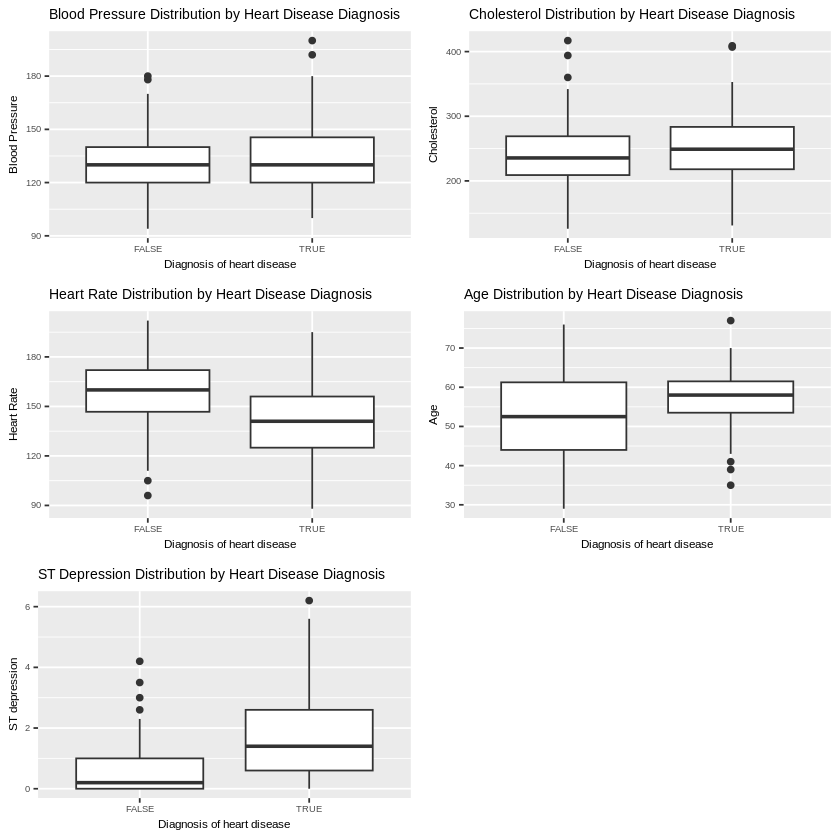

In [7]:
options(repr.plot.height = 7, repr.plot.width = 7)

bp_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = blood_pressure)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Blood Pressure", title = "Blood Pressure Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 7))

chol_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = cholesterol)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Cholesterol", title = "Cholesterol Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 7))

hr_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = heart_rate)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Heart Rate", title = "Heart Rate Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 7))

age_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = age)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "Age", title = "Age Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 7))

dep_box_plot <- cleveland_train |> ggplot(aes(x = diagnosis, y = st_depression)) + geom_boxplot() +
            labs(x = "Diagnosis of heart disease", y = "ST depression", title = "ST Depression Distribution by Heart Disease Diagnosis") + 
            theme(text = element_text(size = 7))

plot_grid(bp_box_plot, chol_box_plot, hr_box_plot,age_box_plot, dep_box_plot, ncol = 2)


From the box plots above, we can see that the most significant variations between the absence and presence of heart disease occur in the values of ST depression and heart rate. This reaffirms our selected predictors.

## Visualizing the relationship between heart disease and chosen predictors

Having chosen the best-suited predictors, let's visualize the relationship between heart disease and ST depression and maximum heart rate with a scatter plot. We will use the ggplot function with heart_rate on the x-axis and st_depression on the y-axis, colored by the diagnosis of the heart disease.

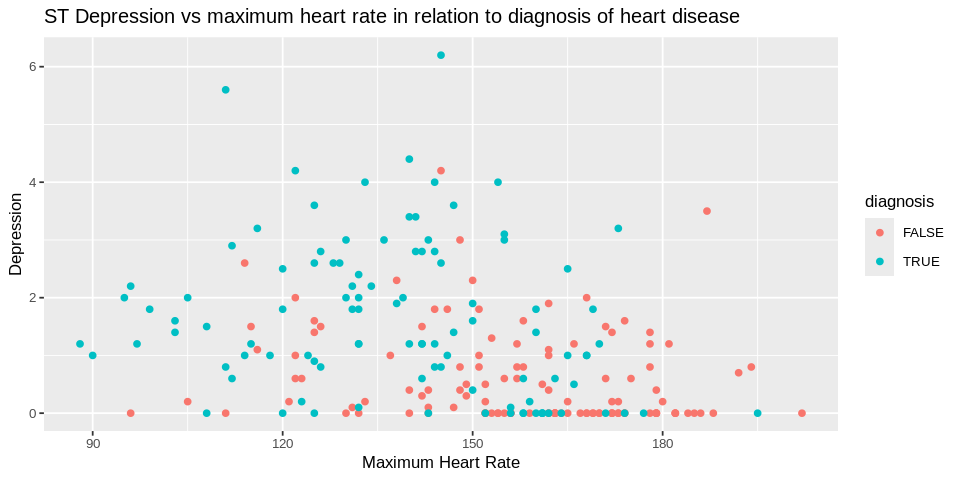

In [8]:
options(repr.plot.height = 4, repr.plot.width = 8)

bp_scatter <- cleveland_train |> 
            ggplot(aes(x = heart_rate, y = st_depression, color = diagnosis)) + 
            geom_point() +
            labs(x = "Maximum Heart Rate", y = "Depression", title = "ST Depression vs maximum heart rate in relation to diagnosis of heart disease") + 
            theme(text = element_text(size = 10))

bp_scatter

With the scatter plot above, we can see that people diagnosed with heart disease have lower maximum heart rate and higher ST depression values.

## Determining the best K-value

We will now determine the best K-value for the K-nearest neighbors algorithm in our model. After standardizing and centering predictors, we will utilize 10-fold cross-validation to assess model performance across K-values ranging from 1 to 100. The resulting plot illustrates the accuracy of different K-values, helping us select the most suitable parameter.

neighbors,mean
<int>,<dbl>
35,0.7462397
36,0.7462397
33,0.7428499
34,0.7428499
29,0.7361267
30,0.7361267


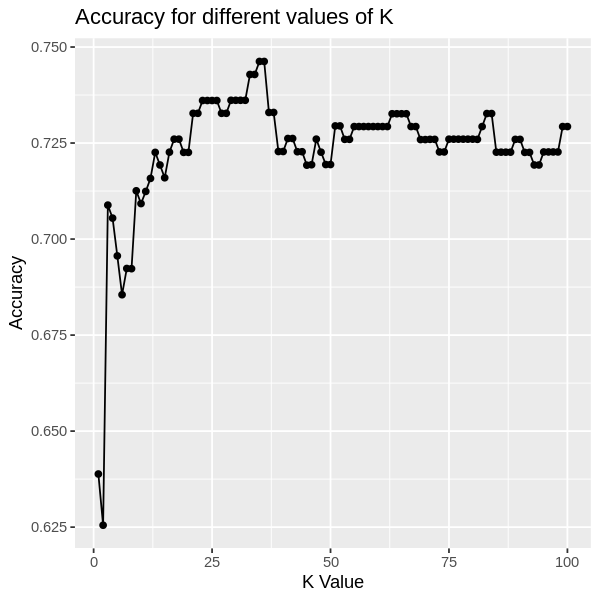

In [13]:
set.seed(0)
dep_recipe <- recipe(diagnosis ~ st_depression + heart_rate, data = cleveland_train) |> 
            step_scale(all_predictors()) |> 
            step_center(all_predictors())

dep_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

dep_vfold <- vfold_cv(cleveland_train, v = 10, strata = diagnosis)

gridvals <- tibble(neighbors = c(1:100))

dep_wkflw <- workflow() |>
          add_recipe(dep_recipe) |>
          add_model(dep_tune_spec) |>
          tune_grid(resamples = hd_vfold, grid = gridvals) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          select(neighbors, mean) |>
          arrange(desc(mean))

head(dep_wkflw)

options(repr.plot.height = 5, repr.plot.width = 5)

dep_result_plot <- dep_wkflw |> 
        ggplot(aes(x = neighbors, y = mean)) + 
        geom_point() + 
        geom_line() + 
        labs(x = "K Value", y = "Accuracy") + 
        ggtitle("Accuracy for different values of K")
dep_result_plot

From both the tibble and the graph showing accuracy for each neighbor value, we can see that the K-value that will yield the highest accuracy is 35. Hence, we will use K = 35 for our final model.

## Creating our Model

Having chosen the optimal K-value 35, we will configure a nearest neighbor model with a rectangular weight function for classification. This model is then trained on our dataset cleveland_train, ensuring it captures the predictive patterns observed during our analysis.

In [10]:
kmin_dep <- dep_wkflw |> slice(1) |> pull(neighbors)

dep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin_dep) |>
  set_engine("kknn") |>
  set_mode("classification")

dep_fit <- workflow() |>
  add_recipe(dep_recipe) |>
  add_model(dep_spec) |>
  fit(data = cleveland_train)

## Testing our Model and Checking its Accuracy

We will proceed to test our model's performance and verify its accuracy using the cleveland_test dataset. After making predictions, we combine the results with the test dataset to generate a summary and assess our model. Additionally, we construct a confusion matrix to check the model's performance across different diagnostic categories.

In [11]:
dep_summary <- dep_fit |>
  predict(cleveland_test) |>
  bind_cols(cleveland_test) 

dep_accuracy <- dep_summary |>
  metrics(truth = diagnosis, estimate = .pred_class) |>
  filter(.metric == 'accuracy')

dep_accuracy

dep_conf_mat<- dep_summary |> 
  conf_mat(truth = diagnosis, estimate = .pred_class)

dep_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7631579


          Truth
Prediction FALSE TRUE
     FALSE    39   16
     TRUE      2   19

Our model achieved an accuracy of approximately 76.32% when tested against the cleveland_test dataset. Based on the confusion matrix, our model has a precision of 90.48% and recall of 54.29%. This means that our model has moderately good overall correctness/performance based on the accuracy, a high precision indicating a more likely correctness when predicting the presence of heart disease, but low recall showing that the model is failing to identify a significant portion of the patients with heart disease in the dataset.

## Underfitting/Overfitting

## Summary
### Selection of Machine Learning Algorithm and Evaluation of Model Performance
**Choosing the Right Algorithm:** The project employed the k-nearest neighbors (KNN) method due to its straightforward and effective approach in handling classification scenarios involving complex variable interactions.

**Evaluating Model Performance:** Accuracy was used to evaluate the model, and cross-validation was used to confirm stability and guarantee that there was no overfitting or underfitting. The model's consistent performance throughout a range of data subsets indicated its suitability for real-world use.

### Data Visualization:
Scatter plots made the link between predictors and heart disease more clear while box plots helped us compare variable distributions across patient groups in an effective manner.

### Advancing the KNN Model: Strategies for Future Enhancements
In order to maximize the KNN model's predicted accuracy, future improvements may concentrate on a number of important areas. First, accuracy may be increased by parameter tuning, which includes modifying the number of neighbors and experimenting with various distance metrics. 

Improving the scalability of the technique is crucial for efficiently handling larger datasets, especially in real-time applications. The specificity of the model can be increased using a more comprehensive set of data, such as genetic markers or particular lifestyle characteristics.

### Answering the Predictive Question:
The predictive question posed at the beginning of the project was: "What are the most significant predictors of heart disease among a set of clinical and physiological variables, and how can these predictors be used to develop a machine learning model to accurately predict the presence of heart disease in individuals?" 
The analysis revealed that certain predictors, particularly ST depression and cholesterol have the most significant impact on the prediction of heart disease. 
The final model shows that ST depression and heart rate are key indicators, with patients exhibiting higher ST depression and lower maximum heart rates more likely to have heart disease.

### Expected Findings vs. Outcome:
#### Initial Expected Findings
After completing this project, we anticipate finding that the common physiological factors closely monitored with heart disease, including cholesterol levels, heart rate, fasting blood sugar, and blood pressure, have a positive relationship with the probability of having or developing heart disease.

#### Outcome
The findings revealed that while all of these parameters are important, heart rate and ST depression were found to be more significant predictors than the others. Despite being substantial, blood pressure and cholesterol did not show the predicted pattern of prediction. This shows that in order to better understand the risk of heart disease, a more comprehensive examination of variables is required.

This change in the results emphasizes how difficult it is to forecast heart disease and how important it is to consider a variety of criteria rather than concentrating only on the most prevalent physiological ones. The machine learning model's results give us a better understanding of the relationship between various predictors/factors and the risk of heart disease.

#### Impact of our findings
- Improved Diagnostic Accuracy : The model provides a tool for early detection of heart disease, potentially leading to better treatment results due to early treatment.
- Specific Preventative Measures: Understanding which factors are most predictive of heart disease allows for better preventive strategies tailored for every individual.
- Healthcare Optimization: By identifying patients with a higher risk for heart disease, allocation of medical resourses can be made more efficient

### What future questions could this lead to?
- Will the same algorithm will work to predict other health issues, not just heart disease?
- How applicable our findings are to diverse populations and whether adjustments are needed to tailor predictive models to specific demographic groups?
- What is the long term accuracy of the model in predicted heart disease over time.
- How do other machine learning algorithms compare to KNN nearest neighbors algorithm in terms of effectiveness and accuracy for predicting heart disease?


## Bibliography
- DSCI100 textbook:
  https://datasciencebook.ca/
- Examines ST depression's role in cardiac diagnostics : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7359984/ 

- Discusses blood pressure's impact on cardiovascular health :
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10243231/ 

- Explores the link between age and heart disease risk :
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/

- Analyzes cholesterol's effect on cardiovascular mortality : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9316578/#:~:text=We%20observed%20a%20linear%20association,inversely%20associated%20with%20CVD%20mortality

- Investigates max heart rate's significance in cardiovascular assessment :
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3755356/
